In [1]:
import h5py
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tqdm import tqdm
from IPython import display
import matplotlib.animation as manimation
from matplotlib.animation import FuncAnimation
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12

plt.rcParams.update()

In [107]:
def loadData(filename):
    global kx,ky,kz,J00,J10,kspec,kspecPhi,kspecBperp,kspecBpar,kspecH,mspec, shellBorders, shellCentres ,n,q,T,mass,beta,freeEnergy,Lx,Ly,Lz,dx,dy,dz,t,time,tF,timeF
    with h5py.File(filename,'r') as f:
        f.visit(print)
        kx = f["geometry/kx"][()]
        ky = f["geometry/ky"][()]
        kz = f["geometry/kz"][()]
        Lx = f["geometry/Lx"][()]
        Ly = f["geometry/Ly"][()]
        Lz = f["geometry/Lz"][()]
        dx = f["geometry/dx"][()]
        dy = f["geometry/dy"][()]
        dz = f["geometry/dz"][()]
        J00 = f["parameters/J00"][()]
        J10 = f["parameters/J10"][()]
        kspec = f["spectra/kSpec"][()]
        kspecPhi = f["spectra/kSpecPhi"][()]
        kspecBperp = f["spectra/kSpecBperp"][()]
        kspecBpar = f["spectra/kSpecBpar"][()]
        kspecH = f["spectra/kSpecH"][()]
        mspec = f["spectra/mSpec"][()]
        t = f["spectra/timestep"][()]
        time = f["spectra/time"][()]
        tF = f["freeEnergy/timestep"][()]
        timeF = f["freeEnergy/time"][()]
        freeEnergy = f["freeEnergy/freeEnergy"][()]
        shellBorders = f["spectra/shellBorders"][()]
        shellCentres = f["spectra/shellCentres"][()]
        n = f["parameters/density"][()]
        q = f["parameters/charge"][()]
        T = f["parameters/temperature"][()]
        beta = f["parameters/beta"][()]
        mass = f["parameters/mass"][()]
        
        

def loadFields(directory,timestep):
    global fields,fields_k
    fields  = {"A":[],"B":[],"phi":[]}
    fields_k = {"A":[],"B":[],"phi":[]}
    filename = os.path.join(directory,"fields.h5")
    with h5py.File(filename,'r') as f:
        #f.visit(print)
        for key in fields:
            fields[key] = f[f"{key}_r"][()]
            fields_k[key] = f[key][()]
        
def loadDistributions(directory,timestep):
    global distr,distr
    distr = {"hr":[], "h":[]}
    filename = os.path.join(directory, f"h_{timestep}.h5")
    with h5py.File(filename,'r') as f:
        for key in distr:
            distr[key] =  f[key][()]
            
def loadAll(directory,timestep):
    loadDistributions(directory,timestep)
    loadFields(directory,timestep)
    
def plotFields(z,t):
    fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(15,15),tight_layout = True)
    labels = {"phi": f"$\phi$","A":"$A_{\parallel}$","B":"$B_{\parallel}$"}
    x = np.linspace(0,Lx,fields["phi"].shape[1])
    y = np.linspace(0,Ly,fields["phi"].shape[2])
    for ax,key in zip(axs,fields):
        ax.set_aspect('equal', 'box')
        pcm = ax.pcolormesh(fields[key][t,...,z],rasterized=True,shading = 'gouraud')#/np.amax(np.abs(fields[key][t,...,z]))
        ax.set_title(labels[key])
        ax.set_xlabel(r"$\rho_i$")
        ax.set_ylabel(r"$\rho_i$")
        # create an axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(pcm, cax=cax)
        #fig.colorbar(pcm, ax=ax)
    plt.show()
        
def plotDistributions(z,m,l,s):
    fig, axs = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(15,15))
    for ax,key in zip(axs,distr):
        ax.set_aspect('equal', 'box')
        pcm = ax.pcolormesh(distr[key][...,z,m,l,s],rasterized=True)
        ax.set_title(key)
        # create an axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(pcm, cax=cax)
        #fig.colorbar(pcm, ax=ax)
        
def loadLocalFreeEnergy(directory,timestep):
    global free
    free = {"Wl" : []}
    for key in free:
        filename = os.path.join(directory, f"{key}_{timestep}.h5")
        with h5py.File(filename,'r') as f:
            free[key] = f["g"][()]


In [108]:
# path to simulation
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["nonlinear_growth","testfold","CFL"]
FIGURE_DIR = "fig"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[-1])
FILENAME_PARAMETERS = os.path.join(BASE_PATH,"parameters.h5")

In [109]:
loadData(FILENAME_PARAMETERS)
loadFields(BASE_PATH,0)
loadDistributions(BASE_PATH,0)

freeEnergy
freeEnergy/freeEnergy
freeEnergy/time
freeEnergy/timestep
geometry
geometry/Lx
geometry/Ly
geometry/Lz
geometry/dx
geometry/dy
geometry/dz
geometry/kx
geometry/ky
geometry/kz
parameters
parameters/J00
parameters/J10
parameters/beta
parameters/charge
parameters/density
parameters/mass
parameters/temperature
spectra
spectra/kSpec
spectra/kSpecBpar
spectra/kSpecBperp
spectra/kSpecH
spectra/kSpecPhi
spectra/mSpec
spectra/shellBorders
spectra/shellCentres
spectra/time
spectra/timestep


In [110]:
distr["h"].shape

(64, 64, 9, 16, 2, 2)

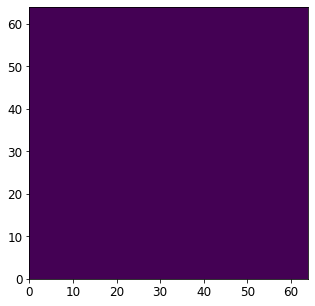

In [111]:
plt.figure(figsize=(5,5))
plt.pcolormesh(np.abs(distr["h"][...,8,1,0,0]))

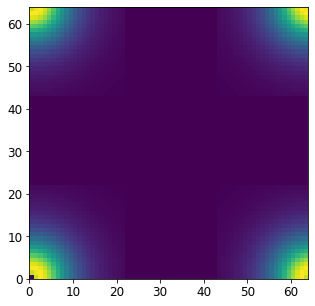

In [112]:
plt.figure(figsize=(5,5))
plt.pcolormesh(np.abs(distr["h"][...,0,1,0,0]))

In [12]:
kz

array([0.        , 0.06283185, 0.12566371, 0.18849556, 0.25132741,
       0.31415927, 0.37699112, 0.43982297, 0.50265482])

In [13]:
kx

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [14]:
fields["A"].shape

(48, 64, 64, 18)

In [15]:
timeF

array([  0.  ,   3.52,   7.04,  10.56,  14.08,  17.6 ,  21.12,  24.64,
        28.16,  31.68,  35.2 ,  38.72,  42.24,  45.76,  49.28,  52.8 ,
        56.32,  59.84,  63.36,  66.88,  70.4 ,  73.92,  77.44,  80.96,
        84.48,  88.  ,  91.52,  95.04,  98.56, 102.08, 105.6 , 109.12,
       112.64, 116.16, 119.68, 123.2 , 126.72, 130.24, 133.76, 137.28,
       140.8 , 144.32, 147.84, 151.36, 154.88, 158.4 , 161.92, 165.44])

In [16]:
0.38+0.04

0.42

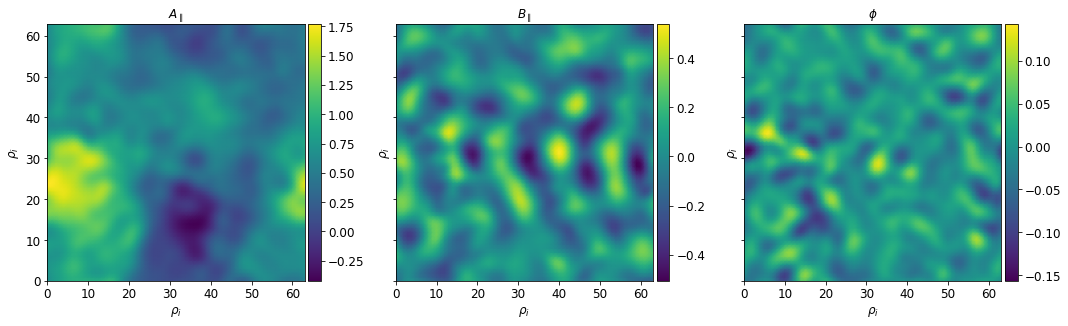

In [70]:
#t = 2000
loadFields(BASE_PATH,t)
plotFields(7,37)

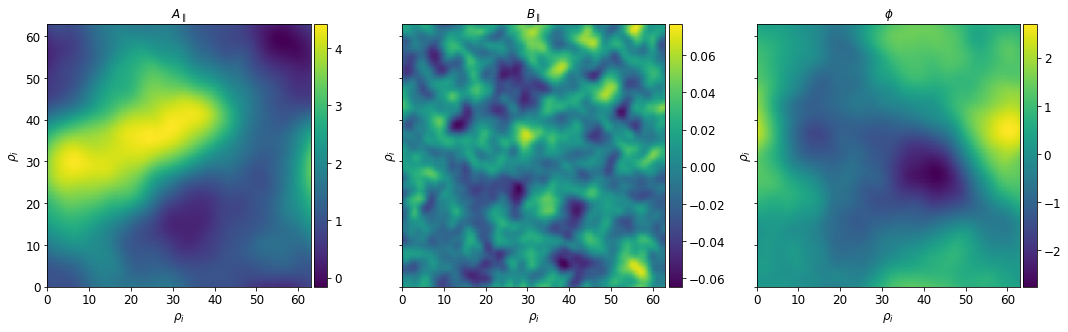

In [181]:
plotFields(15,37)

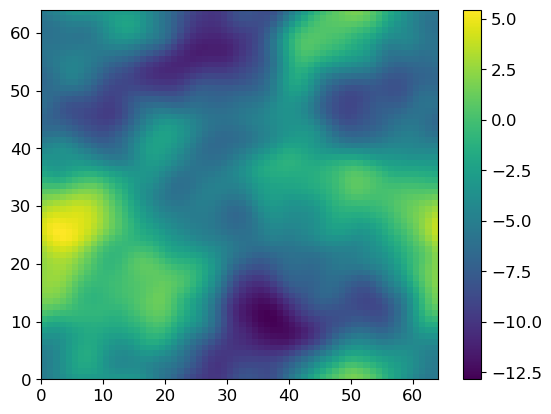

In [43]:

plt.figure()
plt.pcolormesh(distr["hr"][...,0,0,0,0])
plt.colorbar()
plt.show()

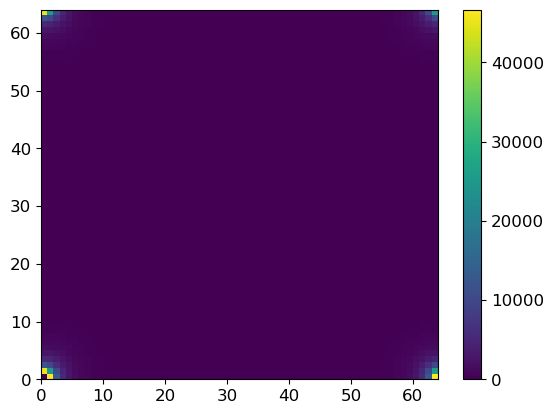

In [46]:
plt.pcolormesh(np.abs(distr["h"][...,0,0,0,0]))
plt.colorbar()
plt.show()

In [58]:
np.sum(fields["phi"][0,...])

4.6566128730773926e-09

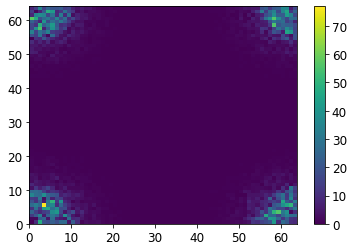

In [56]:
plt.pcolormesh(np.abs(fields_k["phi"][-1,...,3]))#,shading = 'gouraud')
plt.colorbar()

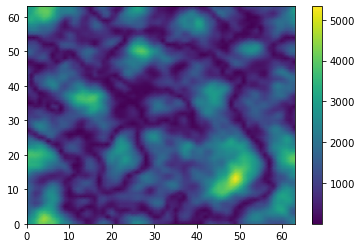

In [131]:
plt.pcolormesh(np.abs(fields["A"][-1,...,0]),shading = 'gouraud')
plt.colorbar()

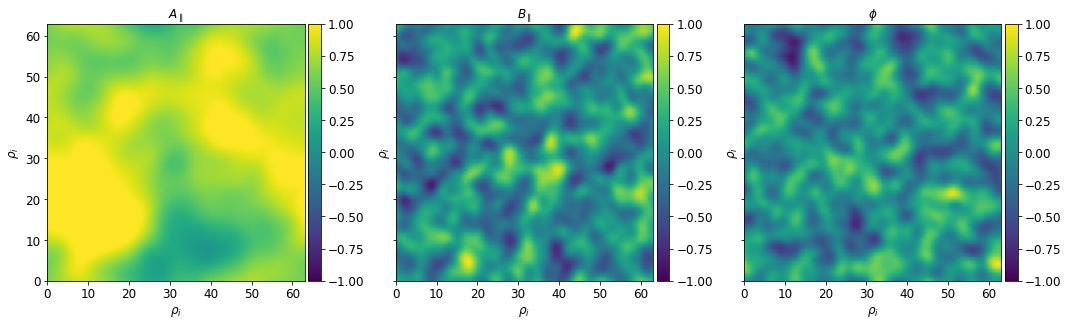

In [71]:
pcms = []
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(15,5),tight_layout = True)
labels = {"phi": f"$\phi$","A":"$A_{\parallel}$","B":"$B_{\parallel}$"}
x = np.linspace(0,Lx,fields["phi"].shape[0])
y = np.linspace(0,Ly,fields["phi"].shape[1])
for ax,key in zip(axs,fields):
    ax.set_aspect('equal', 'box')
    pcm = ax.pcolormesh(fields[key][0,...,0]/np.amax(np.abs(fields[key][0,...,3])),rasterized=True,vmin = -1,vmax = 1,shading = 'gouraud')
    ax.set_title(labels[key])
    ax.set_xlabel(r"$\rho_i$")
    ax.set_ylabel(r"$\rho_i$")
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(pcm, cax=cax)
    pcms.append(pcm)

In [72]:
def animate_fields(i):
    loadFields(BASE_PATH,i)
    for pcm,key in zip(pcms,fields):
        data = fields[key][i,...,0]/np.amax(np.abs(fields[key][i,...,0]))
        pcm.set_array(data.flatten())
        

In [73]:
fields["phi"].shape

(201, 64, 64, 18)

In [74]:
fr = np.arange(0,fields["phi"].shape[0],10)

In [75]:
fr

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [76]:
anim = FuncAnimation(fig, animate_fields, interval=100, frames=fr)
anim.save('fields_new.gif')

In [172]:
t = 2000
loadFields(BASE_PATH,t)
plotFields(7)

TypeError: plotFields() missing 1 required positional argument: 't'

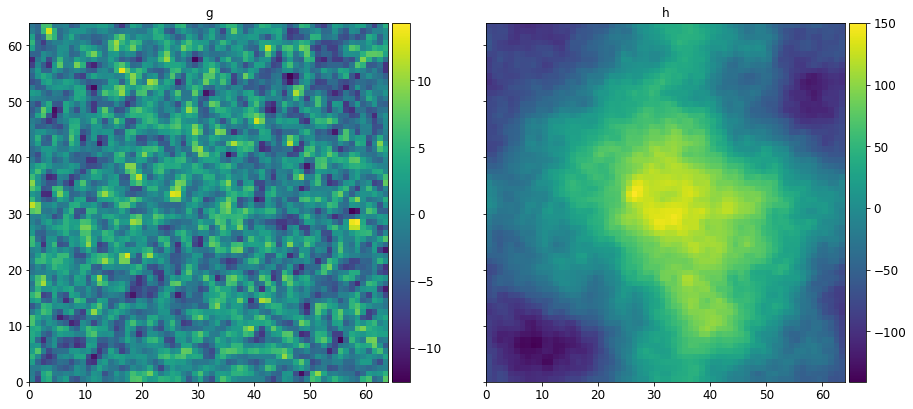

In [202]:
t = 2000
loadDistributions(BASE_PATH,t)
plotDistributions(0,0,0,0)

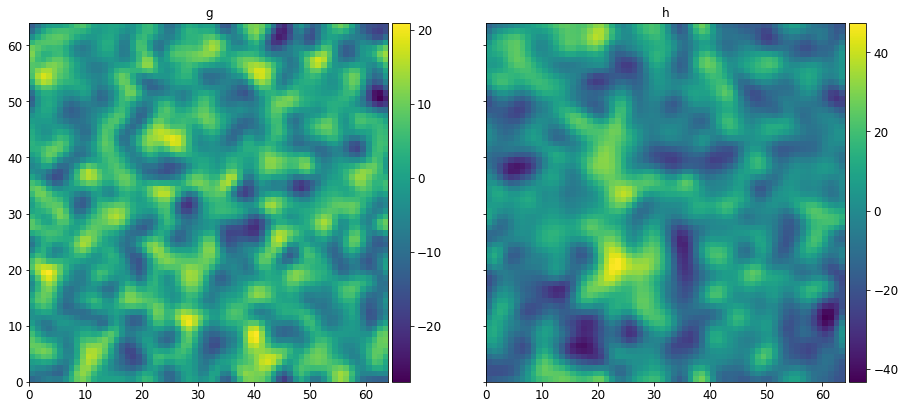

In [203]:
t = 40
loadDistributions(BASE_PATH,t)
plotDistributions(0,0,0,0)

NameError: name 'x' is not defined

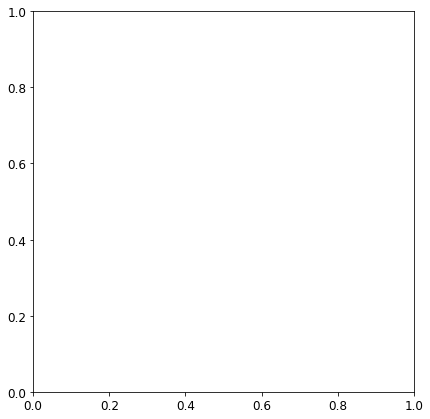

In [171]:
loadDistributions(BASE_PATH,0)
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(7,7))
ax.set_aspect('equal', 'box')
pcm = ax.pcolormesh(x,y,distr["h"][...,0,0,0,0]/np.amax(np.abs(distr["h"][...,0,0,0,0])),rasterized=True,vmax = 1, vmin = -1)
ax.set_title("h")
ax.set_xlabel(r"$\rho_i$")
ax.set_ylabel(r"$\rho_i$")
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(pcm, cax=cax)
#fig.colorbar(pcm, ax=ax)

In [220]:
def animate_h(i):
    loadDistributions(BASE_PATH,i)
    data = distr["h"][...,0,0,0,0]/np.amax(np.abs(distr["h"][...,0,0,0,0]))
    pcm.set_array(data.flatten())
        

In [221]:
anim = FuncAnimation(fig, animate_h, interval=100, frames=fr)
anim.save('h.gif')

In [36]:
distr["g"][...,1,:,:]

array([[[[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]]],


        ...,


        [[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.

In [108]:
freeEnergy2D[60,0,4,0,1,0]

(-38532.138776201-382586.45928240794j)

In [109]:
freeEnergy[0]

299764839931.7648

In [110]:
2* np.real(np.sum(distr_k["g"] * np.conj(distr_k["h"])))

299955992752.6049

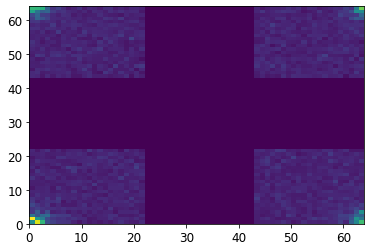

In [111]:

plt.pcolormesh(np.sum(np.abs(freeEnergy2D),axis = (2,3,4,5)))

In [ ]:
kx[32]

In [73]:
def checkReality(h):
    # checking f(kx,ky,0) = f*(-kx,-ky,0)
    arPl = h[1:h.shape[0]//2, 1:h.shape[1]//2, 0, ...]
    arMn = h[h.shape[0]//2+1:, h.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,::-1,...]))
    
    #checking f(0,ky,0) = f*(0,-ky,0)
    arPl = h[0, 1:h.shape[1]//2, 0, ...]
    arMn = h[0, h.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))
    
    #checking f(kx,0,0) = f*(-kx,0,0)
    arPl = h[1:h.shape[0]//2, 0, 0, ...]
    arMn = h[h.shape[0]//2+1:, 0, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))

In [11]:
checkReality(distr_k["g"])

NameError: name 'checkReality' is not defined

In [12]:
plt.pcolormesh(np.abs(freeEnergy[:,:,0,0,0,0]))
#plt.clim([0,1])

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [13]:
freeEnergy.shape

(3,)

In [14]:
np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,0,0,0])))

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [15]:
freeEnergy[2,59,6,0,0,0]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [16]:
freeEnergy[32,0,0,3,0,0]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [17]:
kx[8]

0.5026548245743669

In [18]:
freeEnergy[126,3,0,0,0,0]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [19]:
for i in range(freeEnergy.shape[3]):
    print(f"m = {i}")
    print(f"kx = {np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,i,0,0])))[0]}")
    print(f"ky = {np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,i,0,0])))[1]}")
    print(f"kz = {np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,i,0,0])))[2]}")

IndexError: tuple index out of range

In [20]:
checkReality(distr_k["g"])

NameError: name 'checkReality' is not defined

In [21]:
64/4

16.0

In [22]:
freeEnergy[16,0,0,12,1,1]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [23]:
freeEnergy[48,0,0,13,1,1]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [24]:
freeEnergy.shape

(3,)

In [25]:
kspec.shape

(3, 100)

In [134]:
np.amax(np.sqrt((kx**2+ky**2)))

1.4217225402106772

In [147]:
kspec.shape

(26, 40)

In [22]:
np.amax(np.sqrt(kx**2+ky**2))

2.8434450804213545

In [46]:
np.amax(kx)

2.0106192982974678

In [13]:
kspec.shape

(11, 30)

In [117]:
import matplotlib
fontsize = 12
matplotlib.rcParams.update({'font.size': fontsize})
matplotlib.rc('axes', titlesize=fontsize)
loadData(FILENAME_PARAMETERS)
plt.figure(figsize = (5,5))
plt.plot(shells,kspec[446,:],label=r"$W_{t = 1000}$")
#plt.plot(shells,kspec[56,:],label=r"$W_{t = 1000}$")
plt.plot(shells,kspec[0,:],label=r"$W_{t = 0}$")
#plt.loglog(shells[1:], 6e6*shells[1:]**(-2/2),linestyle = "--",color = "k", label = r"$\frac{1}{k}$")
#plt.ylim([0.1*np.amax(kspec),1.1*np.amax(kspec)])
#plt.xlim([0.1,shells[-1]])
plt.xlabel(f"$k_\perp$")
plt.ylabel(f"$W(k_\perp)$")
plt.legend()
plt.show()
#plt.savefig("kSpec.eps")

freeEnergy
freeEnergy/freeEnergy
freeEnergy/time
freeEnergy/timestep
geometry
geometry/Lx
geometry/Ly
geometry/Lz
geometry/dx
geometry/dy
geometry/dz
geometry/kx
geometry/ky
geometry/kz
parameters
parameters/J00
parameters/J10
parameters/beta
parameters/charge
parameters/density
parameters/mass
parameters/temperature
spectra
spectra/kSpec
spectra/kSpecBpar
spectra/kSpecBperp
spectra/kSpecH
spectra/kSpecPhi
spectra/mSpec
spectra/shellBorders
spectra/shellCentres
spectra/time
spectra/timestep


NameError: name 'shells' is not defined

<Figure size 360x360 with 0 Axes>

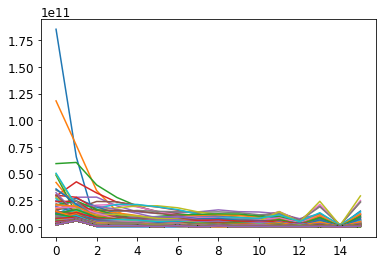

In [118]:
for i in range(mspec.shape[0]):
    plt.plot(mspec[i,:])
plt.show()

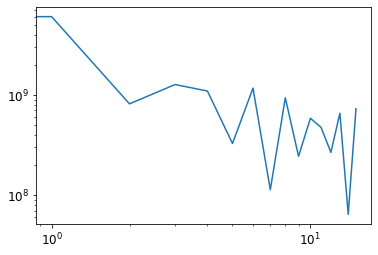

In [142]:
#plt.plot(mspec[0,:])
plt.loglog(mspec[-1,:])
plt.show()

In [20]:
def plotKspec():
    fig, ax = plt.subplots(1,1,figsize = (5,5))
    ax.set_ylim([0.01*np.amax(kspec),1.1*np.amax(kspec)])
    ax.set_xlim([0.1,shells[-1]])
    line, = ax.plot([])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(f"$k_\perp$")
    ax.set_ylabel(f"$W(k_\perp)$")
    plt.tight_layout()

    return fig, line

NameError: name 'shells' is not defined

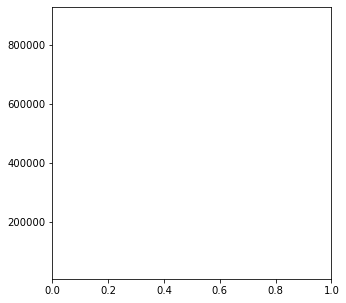

In [89]:
fig,line = plotKspec()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def animate(frame_num,data):
    line.set_data((shells,data[frame_num,:]))
    return line
anim = FuncAnimation(fig, animate, frames=kspec.shape[0], interval=kspec.shape[0],fargs = [kspec])
#anim = FuncAnimation(fig, animate, frames=10, interval=10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#plt.close()   

In [195]:
def write_TriptichMovie(filename):
    MOVIE_NAME = os.path.join(filename)
    FFMpegWriter = manimation.writers['ffmpeg']
    metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
    writer = FFMpegWriter(fps=15, metadata=metadata)

    with writer.saving(fig, MOVIE_NAME, kspec.shape[0]):
        for i in range(100):
            animate(i,kspec)
            writer.grab_frame()

In [196]:
write_TriptichMovie("kSpecNonlEquil.mp4")

In [113]:
kx

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [ ]:
np.where(kspec == np.amax(kspec))

In [ ]:
np.sqrt(np.amax(kx)**2 + np.amax(ky)**2)

In [ ]:
np.sqrt(2*kx[8]**2)

In [ ]:
plt.plot(mspec[6,:])
plt.plot(mspec[0,:])

In [44]:
freeEnergy[100]/freeEnergy[0]

1.002913349294741

In [163]:
freeEnergy[-1]

1141870390365984.5

In [166]:
freeEnergy[-1]

92913529075971.03

In [45]:
(freeEnergy[50]-freeEnergy[40])/freeEnergy[40]

0.00037961607763349376

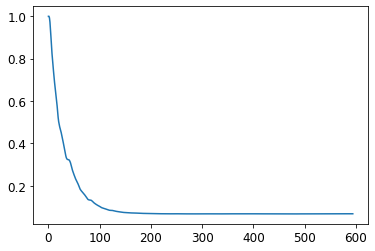

In [120]:
plt.plot(freeEnergy/freeEnergy[0])
plt.show()

In [84]:
dt = [0.0625, 0.0833, 0.125,0.1667,0.25,0.5]

plt.plot(dt[5] * np.arange(freeEnergy05.shape[0])*10,
         (np.abs(freeEnergy05[:]-freeEnergy05[0])/freeEnergy05[0]),label = r"$dt = 0.5$")
plt.plot(dt[4] * np.arange(freeEnergy025.shape[0])*10,
         (np.abs(freeEnergy025[:]-freeEnergy025[0])/freeEnergy025[0]),label = r"$dt = 0.025$")
plt.plot(dt[3] * np.arange(freeEnergy0166.shape[0])*10,
         (np.abs(freeEnergy0166[:]-freeEnergy0166[0])/freeEnergy0166[0]),label = r"$dt = 0.1667$")
plt.plot(dt[2] * np.arange(freeEnergy0125.shape[0])*10,
         (np.abs(freeEnergy0125[:]-freeEnergy0125[0])/freeEnergy0125[0]),label = r"$dt = 0.125$")
#plt.plot(dt[1] * np.arange(freeEnergy0833.shape[0])*10,
#         np.abs(freeEnergy0833[:]-freeEnergy0833[0])/freeEnergy0833[0],label = "dt = 0.0833")
#plt.plot(dt[0] * np.arange(freeEnergy0625.shape[0])*10,
#         np.abs(freeEnergy0625[:]-freeEnergy0625[0])/freeEnergy0625[0],label = "dt = 0.0625")

plt.xlabel(r"t")
plt.ylabel(r"$\epsilon(W(t)/W_{0})$")
plt.yscale("log")
plt.legend()
plt.savefig("freeEnergyErrorNonl.pdf",bbox_inches='tight')

NameError: name 'freeEnergy05' is not defined

In [85]:
err0625 = np.abs(freeEnergy0625[:]-freeEnergy0625[0])/freeEnergy0625[0]
err0833 = np.abs(freeEnergy0833[:]-freeEnergy0833[0])/freeEnergy0833[0]
err0125 = np.abs(freeEnergy0125[:]-freeEnergy0125[0])/freeEnergy0125[0]
err0166 = (np.abs(freeEnergy0166[:]-freeEnergy0166[0])/freeEnergy0166[0])
err025 = np.abs(freeEnergy025[:]-freeEnergy025[0])/freeEnergy025[0]
err05 = np.abs(freeEnergy05[:]-freeEnergy05[0])/freeEnergy05[0]
errAr = ([err0625,err0833,err0125,err0166,err025,err05])

NameError: name 'freeEnergy0625' is not defined

In [14]:
errAr.shape

AttributeError: 'list' object has no attribute 'shape'

In [15]:
def meanError(energy, Nt):
    return np.mean(energy[-Nt:])
meanErr = []
for i,dt_i in enumerate(dt):
    nt =  int(dt[-1]/dt_i * 20)
    meanErr.append(meanError(errAr[i],nt))

In [16]:
meanErr

[0.0011944579440845396,
 0.0014915484457153517,
 0.0019119471113352201,
 0.004140204156427679,
 0.02363464612896965,
 0.4260453527700583]

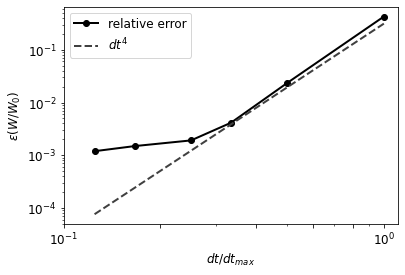

In [58]:
import matplotlib
fontsize = 12
matplotlib.rcParams.update({'font.size': fontsize})
matplotlib.rc('axes', titlesize=fontsize)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')

from matplotlib.ticker import ScalarFormatter
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.loglog(np.array(dt[:])/dt[-1],meanErr,color = 'k',linewidth = 2,marker = "o",label = "relative error")
plt.xlabel(r"$dt/dt_{max}$")
plt.ylabel(r"$\epsilon(W/W_{0})$")
ax.plot(np.array(dt)/dt[-1],5*(np.array(dt))**(4),linestyle = '--',color = [0.25,0.25,0.25],linewidth = 2,label = f"$dt^4$")
#plt.xlim([0.1,1])
ax.set_xticks([0.1,0.2,0.4,0.6,0.8,1])
#plt.xticks([0.1,0.2,0.4,0.6,1])
plt.legend()
plt.savefig("relErrorFromTimeStep.pdf",bbox_inches='tight')

In [12]:
(np.abs(freeEnergy0166[-1]-freeEnergy0166[0])/freeEnergy0166[0])

0.00504451846650117

In [13]:
np.abs((freeEnergy0125[-1]-freeEnergy0125[0])/freeEnergy0125[0])

0.0026703138358960656

In [163]:
err = np.mean((np.abs(freeEnergy0125[-40:]-freeEnergy0125[0])/freeEnergy0125[0]))

In [164]:
err

0.002035098506287877

In [161]:
freeEnDif =


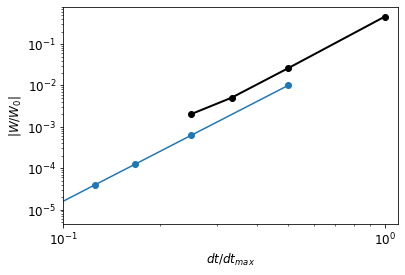

In [165]:
plt.loglog(np.array(dt[1:])/dt[-1],freeEnDif,color = 'k',linewidth = 2,marker = "o")
plt.xlabel(r"$dt/dt_{max}$")
plt.ylabel(r"$|W/W_0|$")
plt.plot(dt,0.01*(np.array(dt)/dt[-1])**(4),marker = "o")
plt.xlim([0.1,1.1])
plt.savefig("relErrorFromTimeStep.eps",bbox_inches='tight')

In [29]:
freeEnergy.shape

(21,)

In [5]:
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_5.h5",'r') as f:
    freeEnergy05 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_25.h5",'r') as f:
    freeEnergy025 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_125.h5",'r') as f:
    freeEnergy0125 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_1667.h5",'r') as f:
    freeEnergy0166 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_0833.h5",'r') as f:
    freeEnergy0833 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_0625.h5",'r') as f:
    freeEnergy0625 = f["freeEnergy/freeEnergy"][()]

In [21]:
np.where((freeEnergy[:]-freeEnergy[0])/freeEnergy[0] == np.amin((freeEnergy[:]-freeEnergy[0])/freeEnergy[0]))

(array([4]),)

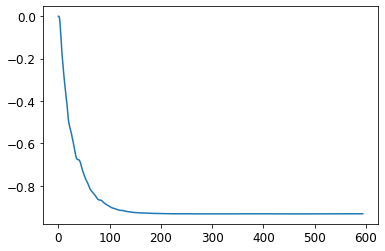

In [121]:
plt.plot((freeEnergy-freeEnergy[0])/freeEnergy[0])


/tmp/ipykernel_5347/2393705415.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.sqrt(k**4 * np.exp(-2 * k**2)/k**2))


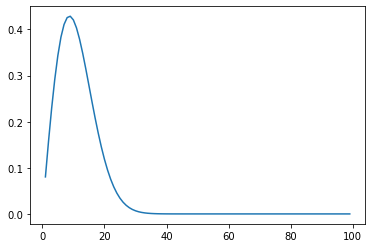

In [93]:
k = np.linspace(0.000000,8,100)
plt.plot(np.sqrt(k**4 * np.exp(-2 * k**2)/k**2))

In [119]:
loadLocalFreeEnergy(BASE_PATH,0)

In [153]:
ksq = np.sqrt(np.amax(kx**2+ky**2 + kz**2))

ValueError: operands could not be broadcast together with shapes (64,) (9,) 

<ipython-input-58-f968a3b88ee4>:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(kx,ky,np.abs(fields_k["B"][0,...,2]))


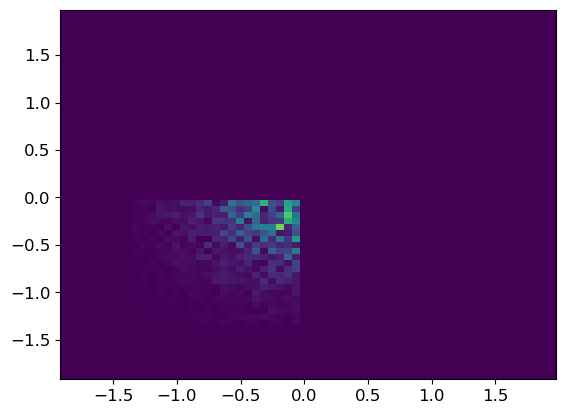

In [58]:
plt.pcolormesh(kx,ky,np.abs(fields_k["B"][0,...,2]))
plt.show()

# FIELDS

In [113]:
def getPhi(g):
    phi = np.zeros((kx.size,ky.size,kz.size),dtype = np.complex128)
    b = 1. + beta * np.sum((n*T)[None,None,:] * J10**2,axis = 2)
    c = np.sum((q*n)[None,None,:] * J10 * J00, axis = 2)
    a = np.sum((q**2 * n / T)[None,None,:] * (1 - J00**2), axis = 2)
    Iphi = np.sum((q * n)[None,None,None,:] * J00[:,:,None,:] * g[:,:,:,0,0,:], axis = 3)
    Ib = np.sum((n * T)[None,None,None,:] * J10[:,:,None,:] * (g[:,:,:,0,0,:] + g[:,:,:,0,1,:]),axis = 3)
    denom = (2 * a * b +beta * c**2)
    mask = (denom > 1e-16)
    print(mask.shape)
    print(phi[mask].shape)
    phi[mask,:] = (2 * b[mask,None] * Iphi[mask,:] - beta * c[mask,None] * Ib[mask,:])/denom[mask,None]
    return phi


def getPhiFromH(h):
    pass

In [114]:
phi = getPhi(distr_k["g"])

(64, 64)
(4095, 9)


In [115]:
np.allclose(phi,fields_k["phi"])

False

In [177]:
class Solution:
    def removeElement(self, nums: list[int], val: int) -> int:
        k = len(nums)
        print(k)
        l = -1
        for i in range(len(nums)):
            p1 = nums[i]
            l = -i-1
            p2 = nums[l]
            while p2 == val:
                l -= 1
                print(l)
                p2 = nums[l]
                print(f"p2 = {p2}")
                
            if p1 == val:
                nums[i] = copy.copy(p2)
                p2 = nums[i]
                k-=1
            print(nums)
            
        return k

In [178]:
[0,1,2,2,3,0,4,2]
2


2

In [179]:
sol = Solution

In [180]:
sol.removeElement(sol,nums = [0,1,2,2,3,0,4,2],val = 2)

8
-2
p2 = 4
[0, 1, 2, 2, 3, 0, 4, 2]
[0, 1, 2, 2, 3, 0, 4, 2]


NameError: name 'copy' is not defined

# scratchspace

In [260]:
filename = f"/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/test_real_cond_0.h5"
with h5py.File(filename,'r') as f:
    h0 = f["g"][()]

filename = f"/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/test_real_cond_1.h5"
with h5py.File(filename,'r') as f:
    h1 = f["g"][()]


In [261]:
h0z = h0[:,0,0,:,:,:]
h1z = h1[:,0,0,:,:,:]
h0zp = h0[1:h0.shape[0]//2,0,0,...]
h0zm= h1[h0.shape[0]//2+1:,0,0,...]


In [262]:
np.allclose(h0zp[::-1,...],np.conj(h0zm))

True

In [263]:
k = 16
h0z[k,1,0,0]

(-233.63620607831004-397.79775816613j)

In [264]:
np.conj(h1z[64-k,1,0,0])

(-233.63620607831004-397.79775816613j)

In [265]:
h1z[k,0,0,0]

(-437.06148496314717-147.66919636293173j)

In [266]:
checkReality(h0,h1)

True
True
True


In [267]:
kx[33]

-1.9477874452256718

In [268]:
kx[32]

2.0106192982974678

In [269]:
kxInd = 32
kyInd = 1
m = 0
print(h1[kxInd,kyInd,0,m,0,0])
print(h1[-kxInd,-kyInd,0,m,0,0])
print(h1[kxInd,-kyInd,0,m,0,0])
print(h1[-kxInd,kyInd,0,m,0,0])


(-0.00458175415887106-0.0017743471626558477j)
(0.004377371765894963+0.002231455903463639j)
(0.004377371765894963+0.002231455903463639j)
(-0.00458175415887106-0.0017743471626558477j)


In [270]:
print(h0[kxInd,kyInd,0,m,0,0])
print(h0[-kxInd,-kyInd,0,m,0,0])
print(h0[kxInd,-kyInd,0,m,0,0])
print(h0[-kxInd,kyInd,0,m,0,0])



(-0.00458175415887106-0.0017743471626558477j)
(0.004377371765894963+0.002231455903463639j)
(0.004377371765894963+0.002231455903463639j)
(-0.00458175415887106-0.0017743471626558477j)


In [154]:
def checkReality(h0,h1):
    # checking f(kx,ky,0) = f*(-kx,-ky,0)
    arPl = h0[1:h0.shape[0]//2, 1:, 0, ...]
    arMn = h1[h1.shape[0]//2+1:, 1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,::-1,...]))
    
    #checking f(0,ky,0) = f*(0,-ky,0)
    arPl = h0[0, 1:h0.shape[1]//2, 0, ...]
    arMn = h1[0, h1.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))
    
    #checking f(kx,0,0) = f*(-kx,0,0)
    arPl = h0[1:h0.shape[0]//2, 0, 0, ...]
    arMn = h1[h1.shape[0]//2+1:, 0, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))

In [122]:
loadData(FILENAME_PARAMETERS)

freeEnergy
freeEnergy/freeEnergy
freeEnergy/time
freeEnergy/timestep
geometry
geometry/Lx
geometry/Ly
geometry/Lz
geometry/dx
geometry/dy
geometry/dz
geometry/kx
geometry/ky
geometry/kz
parameters
parameters/J00
parameters/J10
parameters/beta
parameters/charge
parameters/density
parameters/mass
parameters/temperature
spectra
spectra/kSpec
spectra/kSpecBpar
spectra/kSpecBperp
spectra/kSpecH
spectra/kSpecPhi
spectra/mSpec
spectra/shellBorders
spectra/shellCentres
spectra/time
spectra/timestep


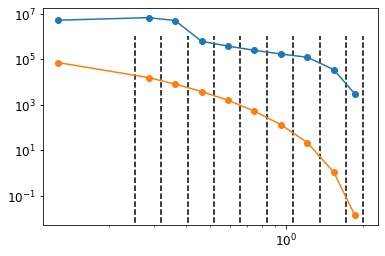

In [123]:
ones = 1e6 * np.ones(shellBorders.shape)
plt.loglog(shellCentres[:],kspec[-1,:],marker = "o")
plt.loglog(shellCentres[:],kspec[0,:],marker = "o")
plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")

In [124]:
kspecPhi

array([[4.94944356e+02, 3.58319993e+02, 2.34128994e+02, ...,
        5.86568095e-01, 2.04943911e-02, 1.53293392e-04],
       [3.68543712e+06, 1.02296896e+05, 3.02233084e+04, ...,
        7.58785498e-01, 1.89372611e-02, 1.19684865e-04],
       [2.84251423e+06, 1.06602907e+05, 4.58458873e+04, ...,
        5.43089952e-01, 1.34883429e-02, 8.78635801e-05],
       ...,
       [5.41453871e+04, 3.57888142e+04, 3.39921822e+04, ...,
        1.29575070e+03, 1.99558190e+02, 9.79731325e+00],
       [5.29020582e+04, 3.79030002e+04, 3.40961963e+04, ...,
        1.30089889e+03, 1.97775683e+02, 8.66964470e+00],
       [5.24491664e+04, 3.50188501e+04, 3.50082567e+04, ...,
        1.26770751e+03, 1.96599698e+02, 8.55334429e+00]])

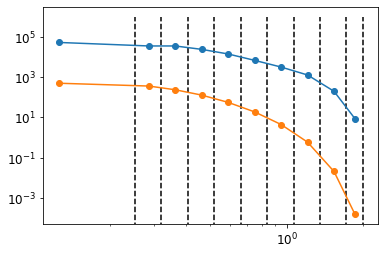

In [125]:
plt.loglog(shellCentres[:],np.abs(kspecPhi[-1,:]),marker = "o")
plt.loglog(shellCentres[:],np.abs(kspecPhi[0,:]),marker = "o")
#plt.loglog(shellCentres[:],5e3*np.exp(-4.9*shellCentres[:]**2),marker = "o")
plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")

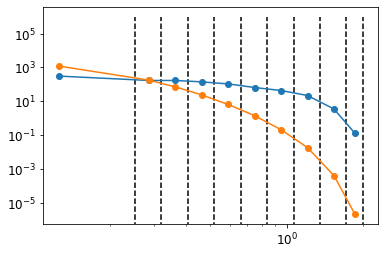

In [126]:
plt.loglog(shellCentres[:],np.abs(kspecBperp[-1,:]),marker = "o")
plt.loglog(shellCentres[:],np.abs(kspecBperp[0,:]),marker = "o")
#plt.loglog(shellCentres[:],1e4*np.exp(-5*shellCentres[:]**2),marker = "o")
plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")

In [115]:
kPerp

NameError: name 'kPerp' is not defined

In [116]:
shellCentres[0]

0.12566370614359174

In [117]:
shellCentres[1]

0.28551040958900226

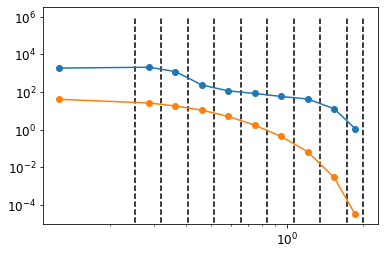

In [127]:
plt.loglog(shellCentres[:],np.abs(kspecBpar[-1,:]),marker = "o")
plt.loglog(shellCentres[:],np.abs(kspecBpar[0,:]),marker = "o")
#plt.loglog(shellCentres[:],1/8/np.pi*np.abs(shellCentres[:])**4,marker = "o")
plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")

In [128]:
np.abs(kspecBpar[0,:])/(0.5/8/np.pi*np.abs(shellCentres[:])**4)

array([8.16689277e+06, 1.96417616e+05, 5.16609481e+04, 1.18853246e+04,
       2.11060336e+03, 2.76305573e+02, 2.63922517e+01, 1.55662328e+00,
       2.55865422e-02, 1.31946072e-04])

In [129]:
shellCentres[0]

0.12566370614359174

In [130]:
(np.abs(shellCentres[0])**4)/np.abs(kspecBpar[0,0])

6.154786634671157e-06

In [131]:
1/8/np.pi*np.abs(shellCentres[0])**4

9.922008537695945e-06

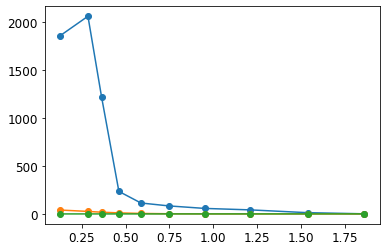

In [132]:
plt.plot(shellCentres[:],np.abs(kspecBpar[-1,:]),marker = "o")
plt.plot(shellCentres[:],np.abs(kspecBpar[0,:]),marker = "o")
plt.plot(shellCentres[:],1/8/np.pi*np.abs(shellCentres[:])**4,marker = "o")
#plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")

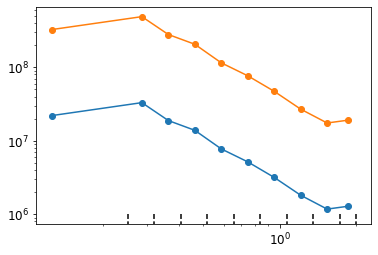

In [133]:
plt.loglog(shellCentres[:],np.abs(kspecH[-1,:]),marker = "o")
plt.loglog(shellCentres[:],np.abs(kspecH[0,:]),marker = "o")
plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")

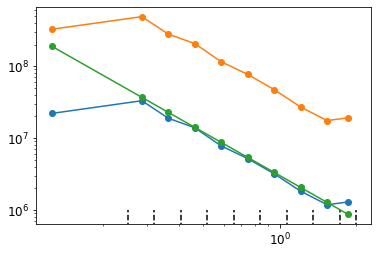

In [137]:
W = kspecH-kspecPhi+kspecBperp+kspecBpar
plt.loglog(shellCentres[:],W[-1,:],marker = "o")
plt.loglog(shellCentres[:],W[0,:],marker = "o")
plt.loglog(shellCentres[:],3e6 * shellCentres[:]**(-6/3),marker = "o")
plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")

In [160]:
kspecH.shape

(202, 10)

In [164]:
norm

1444245324.288838

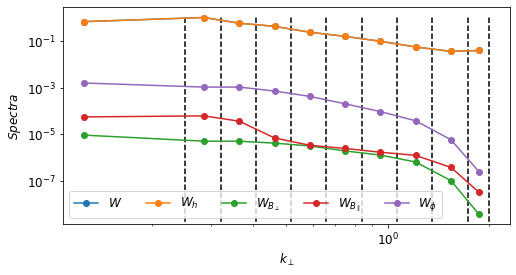

In [138]:
W = kspecH-kspecPhi+kspecBperp+kspecBpar
ones = 1.1 * np.ones(shellBorders.shape)
norm = np.amax(W[-1,:])
plt.figure(figsize = (8,4))
plt.loglog(shellCentres[:],W[-1,:]/norm,marker = "o",label = r"$W$")
plt.loglog(shellCentres[:],np.abs(kspecH[-1,:])/norm,marker = "o",label = r"$W_h$")
plt.loglog(shellCentres[:],np.abs(kspecBperp[-1,:])/norm,marker = "o",label = r"$W_{B_\perp}$")
plt.loglog(shellCentres[:],np.abs(kspecBpar[-1,:])/norm,marker = "o",label = r"$W_{B_\parallel}$")
plt.loglog(shellCentres[:],np.abs(kspecPhi[-1,:])/norm,marker = "o",label = r"$W_\phi$")
plt.vlines(x = shellBorders, ymin=0, ymax=ones, linestyle = "--", color = "k")
plt.xlabel(r"$k_\perp$")
plt.ylabel(r"$Spectra$")
plt.legend(ncol=5)
#plt.savefig("spectra.pdf")
#plt.savefig("spectra.eps")

In [139]:
Wf = np.sum(W,axis = 1)

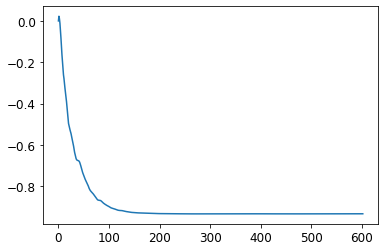

In [140]:
plt.plot((Wf - Wf[0])/Wf[0])

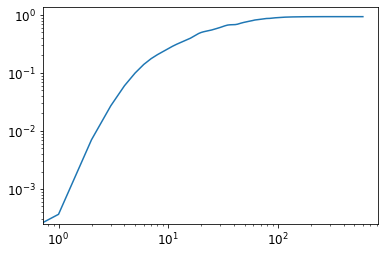

In [141]:
plt.loglog(np.abs(freeEnergy[:-2]-freeEnergy[0])/freeEnergy[0])

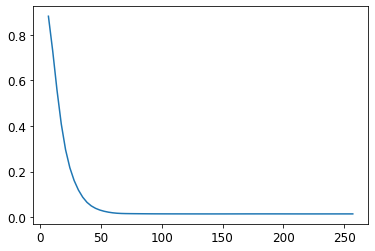

In [45]:
plt.plot(time[2:],(freeEnergy[2:])/freeEnergy[0])
#plt.plot(time[2:],np.exp(-time[2:]))

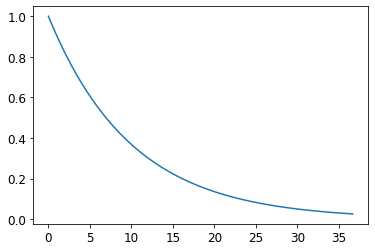

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [107]:
shellCentres.shape

(10,)

In [108]:
kspec.shape

(202, 10)

In [107]:
kperp = np.sqrt((kx**2)[:,None] + (ky**2)[None,:])
masks = []
for i in range(shellBorders.shape[0] - 1):
    mask = ((kperp > shellBorders[i]) & (kperp <= shellBorders[i+1]))
    masks.append(mask)

In [108]:
kperp[mask]

array([1.75929189, 1.82212374, 1.88495559, 1.94778745, 1.94778745,
       1.88495559, 1.82212374, 1.75929189, 1.76041353, 1.82320673,
       1.8860025 , 1.9488006 , 1.9488006 , 1.8860025 , 1.82320673,
       1.76041353, 1.76377417, 1.82645183, 1.88913974, 1.9518369 ,
       1.9518369 , 1.88913974, 1.82645183, 1.76377417, 1.76936105,
       1.83184756, 1.89435693, 1.95688694, 1.95688694, 1.89435693,
       1.83184756, 1.76936105, 1.77715318, 1.839375  , 1.90163694,
       1.96393518, 1.96393518, 1.90163694, 1.839375  , 1.77715318,
       1.72530365, 1.7871217 , 1.8490081 , 1.91095621, 1.97296021,
       1.97296021, 1.91095621, 1.8490081 , 1.7871217 , 1.72530365,
       1.73784319, 1.79923046, 1.86071417, 1.92228507, 1.98393504,
       1.98393504, 1.92228507, 1.86071417, 1.79923046, 1.73784319,
       1.75254697, 1.81343657, 1.87445437, 1.93558824, 1.99682753,
       1.99682753, 1.93558824, 1.87445437, 1.81343657, 1.75254697,
       1.76936105, 1.82969118, 1.89018433, 1.95082533, 1.95082

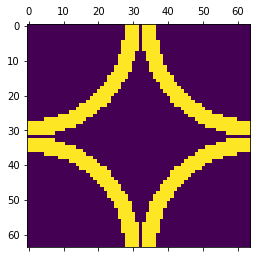

In [124]:
plt.matshow(masks[9])

In [110]:
masks = np.array(masks)

In [111]:
masks.shape

(10, 64, 64)

In [112]:
np.sum(masks, axis = (1,2))*9

array([ 432,  288,  504,  684, 1224, 1836, 2988, 5220, 8064, 7380])

In [113]:
ky

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [11]:
рк

NameError: name 'рк' is not defined

In [127]:
def computeFreeEnergyFromFields(t):
    loadDistributions(BASE_PATH,t)
    W_h = np.sum(np.abs(distr["h"])**2 * T[None,None,None,None,None,:]/mass[None,None,None,None,None,:])
    W_phi = np.sum(np.abs(fields_k["phi"][-1,...,None])**2*q[None,None,None,:]**2*n[None,None,None,:]/2/T[None,None,None:])
    W_A = np.sum(np.abs(fields_k["A"][-1,...])**2*kperp2[...,None] / 8 / np.pi)
    W_B = np.sum(np.abs(fields_k["B"][-1,...])**2 / 8 / np.pi)
    return W_h - W_phi + W_A + W_B

In [128]:
2*np.abs(computeFreeEnergyFromFields(2000))

1437249536405.9507

In [129]:
kperp2 = kx[:,None]**2 + ky[None,:]**2

In [130]:
kperp2.shape

(64, 64)

In [133]:
1401169167641/1437249536405

0.9748962390662876

# LINEAR TIMESTEP

In [80]:
from scipy.optimize import fsolve
from scipy import sparse
from scipy.sparse import linalg
def stability(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4)

def stabilityEquation(dt,maxEig):
    mu = dt * maxEig
    return  np.abs(1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4) - 1

In [67]:
nz = 64
nm = 128
m = np.array([1,1])
T = np.array([1,1])
vT = np.sqrt(2*T/m)
kz = 2 * np.pi * np.arange(nz)

In [68]:
sqrtM = np.array([np.sqrt((m+1)/2) for m in range(nm)])

In [69]:
RHS = kz[:,None,None] * sqrtM[None,:,None] * vT[None,None,:]

In [70]:
Ar = sparse.diags([RHS.flatten(),RHS.flatten()], [-1, 1]).toarray()

NameError: name 'sparse' is not defined

In [172]:
np.amax(np.sum(Ar,axis = 0))

8956.852003327267

In [173]:
maxEig = np.amax(np.sum(Ar,axis = 0))

In [174]:
from matplotlib import pyplot as plt
#plt.matshow(np.abs(Ar))

In [175]:
eigenvalues = sp.sparse.linalg.eigs(Ar)[0]

In [176]:
np.amax(np.abs(eigenvalues))

8731.626557164156

In [81]:
SAFETY_FACTOR = 0.5
n = int(1.5 * np.ceil(np.amax(np.imag(eigenvalues))))
dt = sp.optimize.fsolve(stabilityEquation, x0 = [1], args =  1.j * maxEig)[0]
print(f"max timestep = {dt}")
dt *=SAFETY_FACTOR
print(f"optimized timestep = {dt}")
lamR = np.linspace(-n,n/10,n)
x = np.linspace(-n,n/10,n)
lamR = lamR[:,None] * np.ones(2*n*n).reshape(n,2*n)
lamI = np.linspace(-n,n,2*n)
y = np.linspace(-n,n,2*n)
lamI = lamI[None,:] * np.ones(2*n*n).reshape(n,2*n)
lam = lamR + 1.j * lamI
mu = lam*dt
xx,yy = np.meshgrid(x,y)

NameError: name 'eigenvalues' is not defined

# DISSIPATION TIMESTEP

In [64]:
k_perp = (kx**2)[:,None] + (ky**2)[None,:]

In [100]:
nu_perp = 0.1
nu_m = 0.0
dissip_eig = -np.amax(np.abs(- (nu_perp * (k_perp)[...,None] + nu_m * np.arange(nm)[None,None,:])))

In [101]:
dissip_eig

-0.8085179925372403

In [102]:
SAFETY_FACTOR = 0.5
#n = int(1.5 * np.ceil(np.amax(np.imag(eigenvalues))))
dt = fsolve(stabilityEquation, x0 = [10000], args =  dissip_eig)[0]
print(f"max timestep = {dt}")
dt *=SAFETY_FACTOR
print(f"optimized timestep = {dt}")
lamR = np.linspace(-n,n/10,n)
x = np.linspace(-n,n/10,n)
lamR = lamR[:,None] * np.ones(2*n*n).reshape(n,2*n)
lamI = np.linspace(-n,n,2*n)
y = np.linspace(-n,n,2*n)
lamI = lamI[None,:] * np.ones(2*n*n).reshape(n,2*n)
lam = lamR + 1.j * lamI
mu = lam*dt
xx,yy = np.meshgrid(x,y)

max timestep = 3.4449370194776354
optimized timestep = 1.7224685097388177


TypeError: only integer scalar arrays can be converted to a scalar index

In [78]:
from scipy.optimize import fsolve

In [152]:
stability(dt,1.j * np.amax(np.imag(eigenvalues)))

1.0

In [153]:
R = 1 + mu + 1./2.*mu**2 + 1./6. * mu**3 + 1./24. * mu**4

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (0, 0)

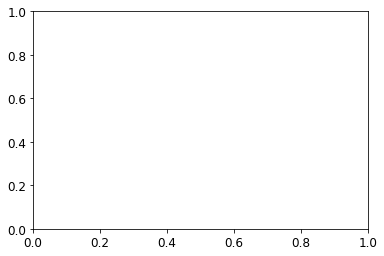

In [155]:
plt.contour(xx,yy,np.abs(R).T,[1],colors = "w")
plt.pcolormesh(xx,yy,np.abs(R).T)
plt.colorbar()
plt.clim([0,1])
#plt.scatter(np.real(eigenvalues),
 #          np.imag(eigenvalues))

In [83]:
kx

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [84]:
ky

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [86]:
kz.shape

(64,)

In [164]:
h = []
timesteps = np.arange(0,2000,10)
filename_h = os.path.join(BASE_PATH, "h_")
for timestep in timesteps:
    with h5py.File(f"{filename_h}{timestep}.h5") as f:
        h.append(f["h"][14,14,...])        

In [111]:
kperp = kx[:,None]**2 + ky[None,:]**2

In [112]:
np.where(np.amax(kperp) == kperp)

(array([32]), array([32]))

In [113]:
kperp[32,32]

8.085179925372403

In [114]:
h = np.asarray(h)

In [115]:
np.count_nonzero(h)

76800

In [116]:
h.shape

(200, 9, 16, 2, 2)

In [117]:
h.shape

(200, 9, 16, 2, 2)

In [118]:
kperp[5,0]*157

15.495278909710292

In [119]:
kx[]

SyntaxError: invalid syntax (1878331831.py, line 1)

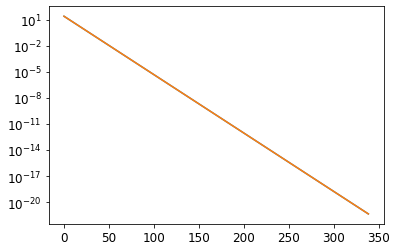

In [137]:
plt.plot(time[0:-2],np.abs(h[0:,0,5,0,0]))
plt.plot(time[0:-2],np.abs(h[0,0,5,0,0])*np.exp(-kperp[14,14]*0.1*time[0:-2]))
plt.yscale("log")

In [121]:
time.shape

(202,)

In [106]:
t.shap

(83,)

In [122]:
time

array([  0. ,   1.7,   3.4,   5.1,   6.8,   8.5,  10.2,  11.9,  13.6,
        15.3,  17. ,  18.7,  20.4,  22.1,  23.8,  25.5,  27.2,  28.9,
        30.6,  32.3,  34. ,  35.7,  37.4,  39.1,  40.8,  42.5,  44.2,
        45.9,  47.6,  49.3,  51. ,  52.7,  54.4,  56.1,  57.8,  59.5,
        61.2,  62.9,  64.6,  66.3,  68. ,  69.7,  71.4,  73.1,  74.8,
        76.5,  78.2,  79.9,  81.6,  83.3,  85. ,  86.7,  88.4,  90.1,
        91.8,  93.5,  95.2,  96.9,  98.6, 100.3, 102. , 103.7, 105.4,
       107.1, 108.8, 110.5, 112.2, 113.9, 115.6, 117.3, 119. , 120.7,
       122.4, 124.1, 125.8, 127.5, 129.2, 130.9, 132.6, 134.3, 136. ,
       137.7, 139.4, 141.1, 142.8, 144.5, 146.2, 147.9, 149.6, 151.3,
       153. , 154.7, 156.4, 158.1, 159.8, 161.5, 163.2, 164.9, 166.6,
       168.3, 170. , 171.7, 173.4, 175.1, 176.8, 178.5, 180.2, 181.9,
       183.6, 185.3, 187. , 188.7, 190.4, 192.1, 193.8, 195.5, 197.2,
       198.9, 200.6, 202.3, 204. , 205.7, 207.4, 209.1, 210.8, 212.5,
       214.2, 215.9,

In [123]:
t

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470, 1480, 1490, 15